<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2013/yolo_woody_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 6.74 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import shutil
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
cd YoloV3/

/content/YoloV3


In [6]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [0]:
shutil.rmtree('/content/YoloV3/data/customdata')

Place the weights(yolov3-spp-ultralytics.pt) 

In [0]:
os.mkdir('weights')

In [9]:
shutil.copy('/content/gdrive/My Drive/Colab Notebooks/eva_files/yolo/yolov3-spp-ultralytics.pt','/content/YoloV3/weights')

'/content/YoloV3/weights/yolov3-spp-ultralytics.pt'

**Place the data folder with images,labels... in YoloV3/data folder**

In [10]:
from distutils.dir_util import copy_tree
copy_tree('/content/gdrive/My Drive/yolo_woody', '/content/YoloV3/data')

['/content/YoloV3/data/customdata/custom.names',
 '/content/YoloV3/data/customdata/test.txt',
 '/content/YoloV3/data/customdata/custom.data',
 '/content/YoloV3/data/customdata/custom.shapes',
 '/content/YoloV3/data/customdata/custom.txt',
 '/content/YoloV3/data/customdata/images/1.jpg',
 '/content/YoloV3/data/customdata/images/2.jpg',
 '/content/YoloV3/data/customdata/images/3.jpg',
 '/content/YoloV3/data/customdata/images/530.jpg',
 '/content/YoloV3/data/customdata/images/6.jpg',
 '/content/YoloV3/data/customdata/images/7.jpg',
 '/content/YoloV3/data/customdata/images/8.jpg',
 '/content/YoloV3/data/customdata/images/9.jpg',
 '/content/YoloV3/data/customdata/images/10.jpg',
 '/content/YoloV3/data/customdata/images/11.jpg',
 '/content/YoloV3/data/customdata/images/12.jpg',
 '/content/YoloV3/data/customdata/images/13.jpg',
 '/content/YoloV3/data/customdata/images/14.jpg',
 '/content/YoloV3/data/customdata/images/15.jpg',
 '/content/YoloV3/data/customdata/images/16.jpg',
 '/content/YoloV3

In [11]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [12]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 08:03:12.197799: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4474.40it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 101.44it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [13]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 400 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=400, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 08:04:36.694029: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (448 found, 0 missing, 1 empty, 0 duplicate, for 449 images): 100% 449/449 [00:00<00:00, 6250.70it/s]
Caching images (0.2GB): 100% 449/449 [00:00<00:00, 555.26it/s]
Reading image shapes: 100% 70/70 [00:00<00:00, 4255.46it/s]
Caching labels (70 found, 0

In [17]:
!python detect.py --conf-thres 0.1 --output out_out --names data/customdata/custom.data --source '/content/gdrive/My Drive/yolo_woody/test_images'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.data', output='out_out', save_txt=False, source='/content/gdrive/My Drive/yolo_woody/test_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/6 /content/gdrive/My Drive/yolo_woody/test_images/test1.jpg: 320x512 2 classes=1s, Done. (0.020s)
image 2/6 /content/gdrive/My Drive/yolo_woody/test_images/test2.jpg: 256x512 2 classes=1s, Done. (0.019s)
image 3/6 /content/gdrive/My Drive/yolo_woody/test_images/test3.jpg: 384x512 1 classes=1s, Done. (0.025s)
image 4/6 /content/gdrive/My Drive/yolo_woody/test_images/test4.jpg: 320x512 Done. (0.019s)
image 5/6 /content/gdrive/My Drive/yolo_woody/test_images/test5 (1).jpg: 448x512 

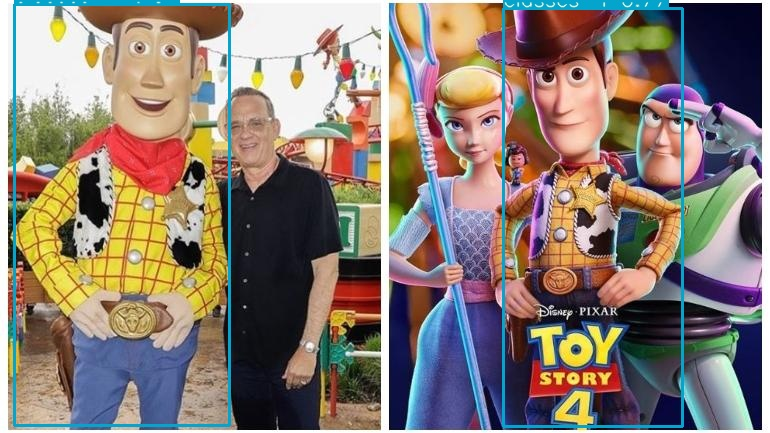

In [18]:
Image(filename='out_out/test1.jpg', width=600)

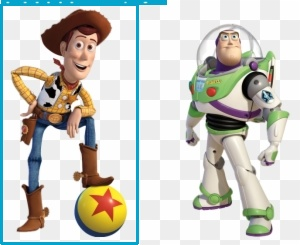

In [27]:
Image(filename='out_out/test5 (1).jpg', width=600)

**Predict bounding box for test video**

In [0]:
!python detect.py --conf-thres 0.1 --output '/content/gdrive/My Drive/woody_output' --names data/customdata/custom.names --source '/content/gdrive/My Drive/yolo_woody/output_clip.mp4'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/woody_output', save_txt=False, source='/content/gdrive/My Drive/yolo_woody/output_clip.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1829) /content/gdrive/My Drive/yolo_woody/output_clip.mp4: 320x512 Done. (0.018s)
video 1/1 (2/1829) /content/gdrive/My Drive/yolo_woody/output_clip.mp4: 320x512 Done. (0.019s)
video 1/1 (3/1829) /content/gdrive/My Drive/yolo_woody/output_clip.mp4: 320x512 Done. (0.015s)
video 1/1 (4/1829) /content/gdrive/My Drive/yolo_woody/output_clip.mp4: 320x512 Done. (0.016s)
video 1/1 (5/1829) /content/gdrive/My Drive/yolo_woody/output_clip.mp4: 320x